In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow as cv2
from math import sqrt
from itertools import chain

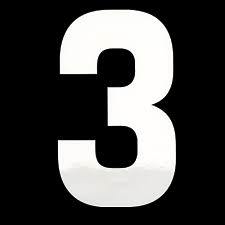

In [ ]:
image=255-cv.imread('/content/img.jpeg')
cv2(image)

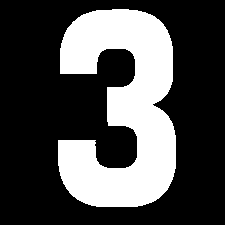

In [ ]:
grey=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
ret, img = cv.threshold(grey, 70, 255, cv.THRESH_BINARY)

cv2(img)

In [ ]:
for i, row in enumerate(img):
    for j, value in enumerate(row):
        if value == 255:
            start_point = (i, j)
            print(start_point, value)
            break
    else:
        continue
    break

(9, 112) 255


In [ ]:
img[3:6, 19:22]
directions = [ 0,  1,  2,
               7,      3,
               6,  5,  4]
dir2idx = dict(zip(directions, range(len(directions))))

change_j =   [-1,  0,  1, # x or columns
              -1,      1,
              -1,  0,  1]

change_i =   [-1, -1, -1, # y or rows
               0,      0,
               1,  1,  1]


In [ ]:
border = []
chain = []
curr_point = start_point
for direction in directions:
    idx = dir2idx[direction]
    new_point = (start_point[0]+change_i[idx], start_point[1]+change_j[idx])
    if img[new_point] != 0: # if is ROI
        border.append(new_point)
        chain.append(direction)
        curr_point = new_point
        break

798
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 5, 5, 4, 5, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 7, 6, 7, 6, 4, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 5, 4, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 7, 6, 7, 7, 6, 7, 7, 6, 7, 7, 6, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7, 7, 0, 7, 7, 0, 7, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 0, 0, 7, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,

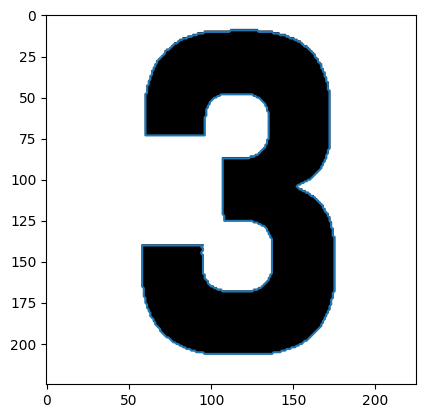

In [ ]:
count = 0
while curr_point != start_point:
    #figure direction to start search
    b_direction = (direction + 5) % 8
    dirs_1 = range(b_direction, 8)
    dirs_2 = range(0, b_direction)
    dirs = []
    dirs.extend(dirs_1)
    dirs.extend(dirs_2)
    for direction in dirs:
        idx = dir2idx[direction]
        new_point = (curr_point[0]+change_i[idx], curr_point[1]+change_j[idx])
        if img[new_point] != 0: # if is ROI
            border.append(new_point)
            chain.append(direction)
            curr_point = new_point
            break
    if count == 5000: break
    count += 1

print(count)
print(chain)
plt.imshow(img, cmap='Greys')
plt.plot([i[1] for i in border], [i[0] for i in border])

